# Assignment 3
-------
## Particulars

This assignment is due Thursday April 11, 2019. The last commit at (or before) 23h59 on that date will be graded for credit.

It must be turned in (committed) to your private repository on the course's github organization located at [github.com/orgs/mgt-416-2019](https://github.com/orgs/mgt-416-2019).

__Commit early and commit often. And be sure to push.__

-------
## Types of Problems and Evaluation

On this assignment there are two types of questions: <span style="color:red">Technical</span> and <span style="color:blue">Analytical</span>.

The primary goal of a <span style="color:red">technical</span> problem is to carry out the requested coding/computational analysis and output or visualize the result. In these problems the primary factors in evaluation are: does the code/analysis work; does it do what it is supposed to do; is it comprehensible (_i.e._ commented [always] and explained [in cases where code is very involved]).

The primary goal of an <span style="color:blue">analytical</span> problem is to answer a question about some network(s) or data being certain to justifying your answer with a well thought out, and presented, line of reasoning. In these problems the primary factors in evaluation are: is the answer well thought out and it well presented and intelligibile (you are strongly advised to make use of [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [magics](http://ipython.readthedocs.io/en/stable/interactive/magics.html) _ex_. %%latex or $\latex$ in your answers).

Each problem and question has associated with it a number of points that it will be graded out of. Please use the point values as a guide as to how much time/effort should be devoted to each question.

-------
## Instructions

Complete each of the problems found below to the best of your abilities. It is highly advisable that you at least attempt each problem/question.

After the cell proposing each problem there is a markdown cell in which your mark for each question will be recorded and a code cell in which your total mark for that problem will be stored. __Do not edit these cells.__

Following the marking cells there is a series of cells you may use to complete each question. Feel free to add additional markdown and code cells as required.

If you encounter any major issues, require clarification and/or you believe there is an error in a question or the data, do not hesitate to email me at: [orion.penner@epfl.ch](mailto:orion.penner@epfl.ch).

-------
## Imports

The packages imported below are necessary for completing the assignment.

If there are other packages you are used to using that you wish to import, please feel free to do so __provided__ the package is __fully installable through pip__. If you want clarification on this, please email me.

In [1]:
# Allows matplotlib figures inline
%matplotlib inline
# Our standard network analysis module. Please use as nx so I may read code more easily.
import networkx as nx
# Our standard ploting module. Again, please use as plt.
import matplotlib.pyplot as plt
# Can be used to make the printing of certain objects (especially dictionaries and tuples) easier for humans.
import pprint

In [2]:
# Just a lazy way of supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# You will need the powerlaw package to fit degree distributions in Problem 2, Question 3
import powerlaw
# You will need this for the rewiring in Problem 2, Question 6
import random
import numpy as np
import pandas as pd
from IPython.core.display import HTML

In [4]:
random.seed(42)

----
## Problem 1
25 points.

In this problem you will explore the community structure of the football transfer network.

1. Install and import the python-louvain module and then print its version. [<span style="color:red">Technical</span>] [1]
2. Find the community structure of the Undirected_Club-Club_TransferNetwork network loaded below. Use the community module installed in the previous step. Specifically use the best_partition function setting random_state to 0 and randomize to false. [<span style="color:red">Technical</span>] [1]
3. Calculate the number of nodes in each community and quickly plot a bar chart of the counts (not a histogram, just a bar chart in which each community is its own bar). [<span style="color:red">Technical</span>] [1]
4. Make a dictionary that contains the subgraph corresponding to each community. _i.e._ Community_Subgraphs["Community i"] = Undirected_TransferNetwork_Club.subgraph... [<span style="color:red">Technical</span>] [1]
5. For each community, calculate and print the total value of transfers __internal__ to that community. _hint_: It should be easy to do this using the subgraphs created in the previous step, but take care to avoid double counting. Sum these values. How does this total internal value compare to the total value of all transfers found in the network (_hint_: Sum the TotalValue of all links in the original network). [<span style="color:red">Technical</span>] [1]
6. For each community, count the number of clubs in that community from each nation. Using those counts, calculate the percentage of clubs in that community hailing from each nation. Also, calculate the percentage of all of the clubs from each nation that appear in that given community. For example, say you find a community with 20 clubs, 5 of which are from Switzerland, and there are 15 Swiss clubs in the entire data set (original network). The first quantity (count) would be five. The second quantity (percentage within community) would be 5/20 = 25%. The third quantity (percentage of all clubs from nation) would be 5/15 = 33%. For each community print the Top 10 nations (based on count). Please make this a nice formatted print that also includes the percentages calculated. [<span style="color:red">Technical</span>] [2]
7. For each community, calculate the fraction of the community's sum of "InOutValue" contributed by nodes from each nation. Reprint the results of the previous question with an additional column for this new quantity. _hint_: Don't over think this, just sum the "InOutValue" field across all nodes in each community and then calculate the fraction that comes from clubs of each nation. [<span style="color:red">Technical</span>] [3]
8. For each community, does a specific nation dominate in either measure. If yes, which nation. Does the domination differ between the "counting" version of the ranking (question 6) and the weighted sum (question 7) differ for any communities? [<span style="color:blue">Analytical</span>] [3]
9. For each community, print the top five clubs (_i.e._ nodes) ranked by "InOutValue". To make interpretation easier, also print each club's nation and league. [<span style="color:red">Technical</span>] [2]
10. Is it the case that for most communities the top clubs are those from the nation that also dominate the rankings calculated in questions 6 and 7? Which cases notably diverge? Can you see an obvious reason for this? [<span style="color:blue">Analytical</span>] [3]
11. From the results and interpretation of questions 6 through 10 assign a label to each community and save that in a dictionary. For example, if a community is dominated by English clubs, perhaps call that community: English_1. If dominated by two nations, Nation1/Nation2. If by a specific world region, _ex._ Asia. [<span style="color:blue">Analytical</span>] [1]
12. Using the community.induced_graph function find the induced graph in which communities are now nodes. Use the option weight='TotalValue'. Plot this network using a spring layout. Label each node using the labels you arrived at in the previous step (you may need to shorten them). Do not worry about labeling links. [<span style="color:red">Technical</span>] [3]
13. Using the induced graph from the previous step, now filter out all links with weight less than 50,000,000 euros. Plot the graph again using the spring layout such that the edge widths are proportional to the logarithm of the edge weight. You will likely have to multiply the raw logarithm by a scaling factor so the links are in proper proportion to the nodes. [<span style="color:red">Technical</span>] [3]

#### Problem 1 Grades

1.1) None/1

1.2) None/1

1.3) None/1

1.4) None/1

1.5) None/1

1.6) None/2

1.7) None/3

1.8) None/3

1.9) None/2

1.10) None/3

1.11) None/1

1.12) None/3

1.13) None/3

Total: None/25

In [5]:
Problem1Score = None

In [6]:
# So we all get the same communities we have to jump through some hoops to get an ordered version of the network.
Undirected_TransferNetwork_Club_unordered = nx.read_graphml('Undirected_Club-Club_TransferNetwork.graphml')
OrderedNodeList = sorted(list(Undirected_TransferNetwork_Club_unordered.nodes))
Undirected_TransferNetwork_Club = nx.OrderedGraph()
for nodeid in OrderedNodeList:
    Undirected_TransferNetwork_Club.add_node(nodeid)
nx.set_node_attributes(Undirected_TransferNetwork_Club, dict(Undirected_TransferNetwork_Club_unordered.nodes))
EdgeListForSorting = [sorted(list(tup)) for tup in list(Undirected_TransferNetwork_Club_unordered.edges)]
OrderedEdgeList = sorted(EdgeListForSorting, key=lambda edge: (edge[0], edge[1]))
for edge in OrderedEdgeList:
    Undirected_TransferNetwork_Club.add_edge(*edge)
nx.set_edge_attributes(Undirected_TransferNetwork_Club, dict(Undirected_TransferNetwork_Club_unordered.edges))

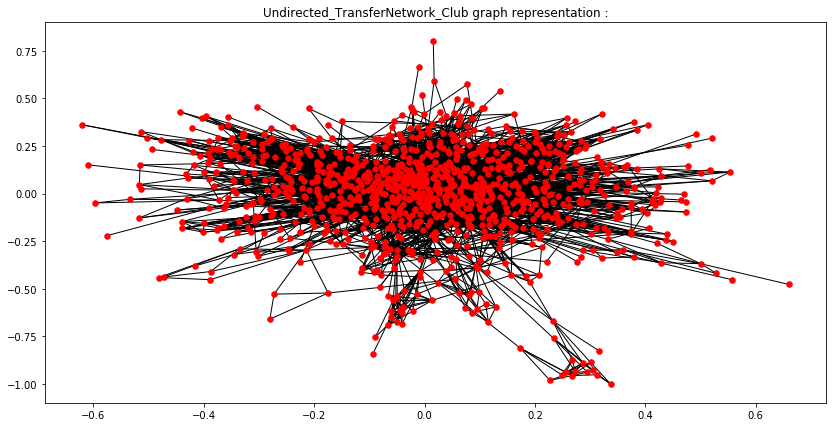

In [7]:
# Plot the graph
plt.figure(figsize=(14,7))
nx.draw_networkx(Undirected_TransferNetwork_Club, pos=nx.spring_layout(Undirected_TransferNetwork_Club), with_labels = False, node_size = 30)
plt.title('Undirected_TransferNetwork_Club graph representation :')
plt.show()

In [8]:
print(nx.info(Undirected_TransferNetwork_Club))

Name: 
Type: OrderedGraph
Number of nodes: 1029
Number of edges: 4865
Average degree:   9.4558


In [9]:
# Example of the different attributes of a node
Undirected_TransferNetwork_Club.node['/delfino-pescara-1936/startseite/verein/2921']

{'Club_ID': '/delfino-pescara-1936/startseite/verein/2921',
 'Club_Name': 'Pescara',
 'Club_League': 'Serie B',
 'Club_LeagueNation': 'Italy',
 'InOutValue': 54740000.0}

In [10]:
# Example of the different attributes of an edge
dict(Undirected_TransferNetwork_Club.adj['/cd-palestino/startseite/verein/6536'])

{'/club-universidad-de-chile/startseite/verein/1037': OrderedDict([('Number',
               3),
              ('Number_w_Value', 1),
              ('Number_nonFree', 1),
              ('TotalValue', 365000.0),
              ('LogValue', 12.807655372286902)]),
 '/csd-colo-colo/startseite/verein/2433': OrderedDict([('Number', 3),
              ('Number_w_Value', 2),
              ('Number_nonFree', 1),
              ('TotalValue', 450000.0),
              ('LogValue', 13.017005083966255)])}

---

### 1.1

***Install and import the python-louvain module and then print its version.***

In [11]:
!pip install python-louvain

This package contains an implementation of the Louvain algorithm for community detection. The package name on pip is `python-louvain` but it is imported as `community` in python. The documentation can be found [here](http://python-louvain.readthedocs.io/).

In [12]:
import community 
print('The version of the python-louvain library is :', community.__version__)

The version of the python-louvain library is : 0.13


### 1.2
***Find the community structure of the Undirected_Club-Club_TransferNetwork network loaded below. Use the community module installed in the previous step. Specifically use the best_partition function setting random_state to 0 and randomize to false.***

In [13]:
partition = community.best_partition(Undirected_TransferNetwork_Club,
                                     randomize=False,
                                     random_state=0)

### 1.3

***Calculate the number of nodes in each community and quickly plot a bar chart of the counts (not a histogram, just a bar chart in which each community is its own bar).***

In [14]:
# Set the label
labels = set(partition.values())
# Create a dictionary containing the counts
community_counts = {i: list(partition.values()).count(i) for i in labels}
# Print community ID with the number of nodes implies in each
pp = pprint.PrettyPrinter(indent=2)
print('Community ID with the number of nodes implies in each :')
pp.pprint(community_counts)

Community ID with the number of nodes implies in each :
{ 0: 43,
  1: 126,
  2: 99,
  3: 59,
  4: 140,
  5: 101,
  6: 75,
  7: 36,
  8: 39,
  9: 42,
  10: 38,
  11: 48,
  12: 80,
  13: 66,
  14: 37}


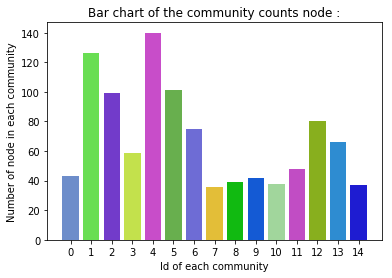

In [15]:
# Define a colormap of 15 random colors
colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
                     "#e3be38", "#11ba11", "#145ad4", "#a1d69c", "#c14dc4", "#88af1e", "#2e8cd1",
                     "#1e1cd1",])
# Make a bar chart of the counts (not a histogram, just a bar chart in which each community is its own bar).
plt.xticks(range(len(list(community_counts.keys()))), list(community_counts.keys()))
plt.bar(list(community_counts.keys()), list(community_counts.values()), color = colormap)
plt.title('Bar chart of the community counts node :')
plt.xlabel('Id of each community')
plt.ylabel('Number of node in each community')
plt.show()

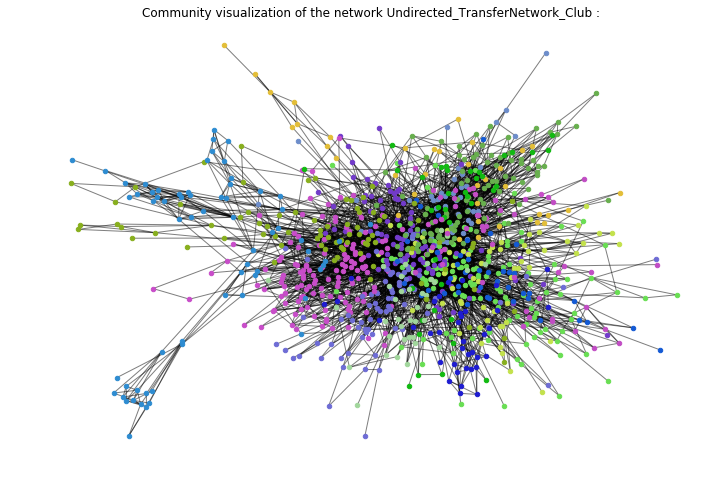

In [16]:
# Plot the community network 
plt.figure(figsize=(12,8))
pos = nx.spring_layout(Undirected_TransferNetwork_Club)

count = 0
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(Undirected_TransferNetwork_Club, pos, list_nodes, node_size = 20, node_color = colormap[count])
    count = count + 1

nx.draw_networkx_edges(Undirected_TransferNetwork_Club, pos, alpha=0.5)
plt.axis('off')
plt.title('Community visualization of the network Undirected_TransferNetwork_Club : ')
plt.show()

### 1.4
***Make a dictionary that contains the subgraph corresponding to each community. i.e. Community_Subgraphs["Community i"] = Undirected_TransferNetwork_Club.subgraph...***

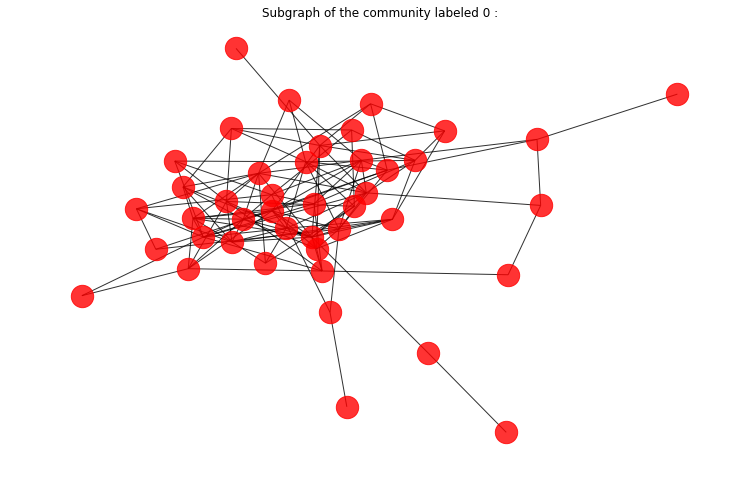

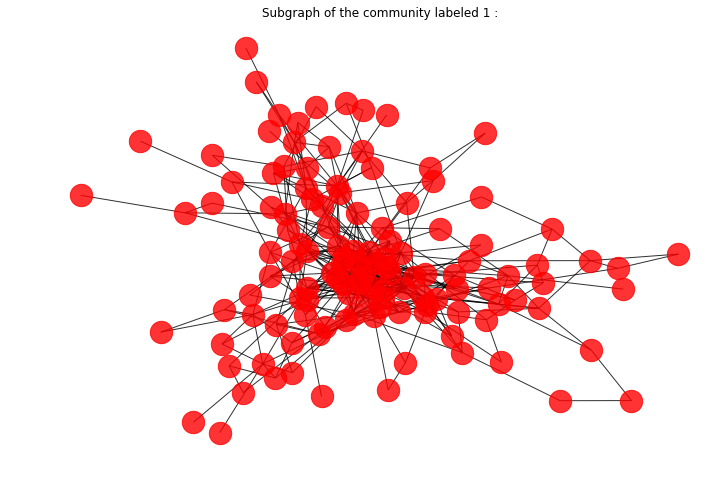

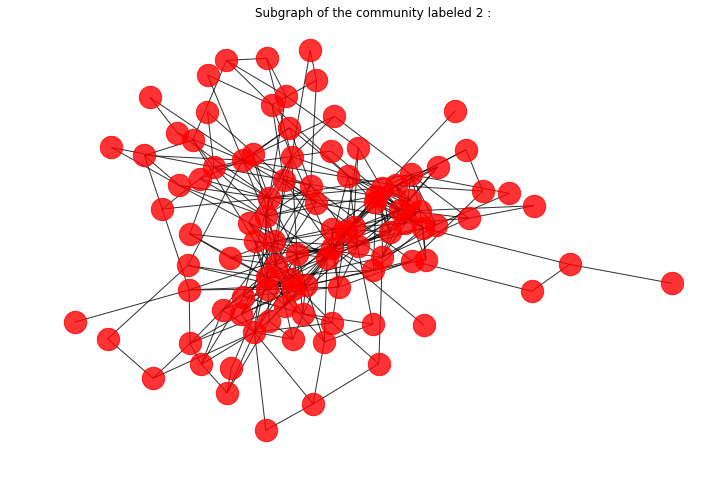

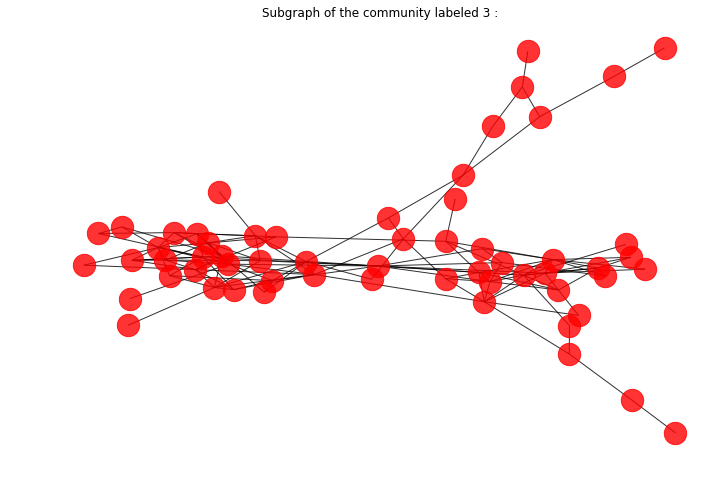

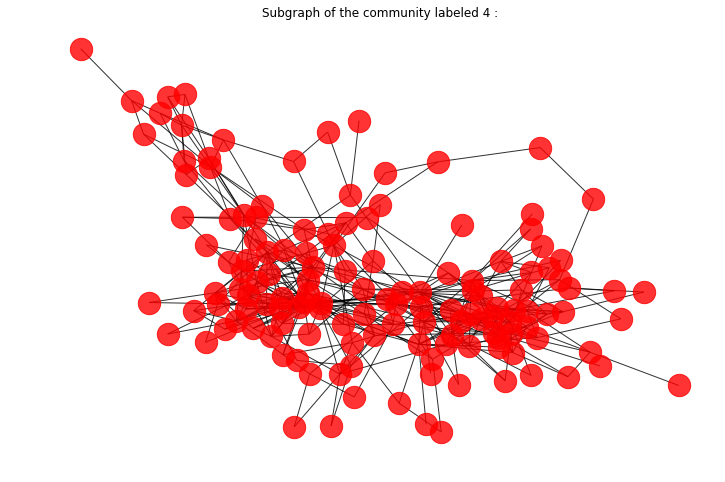

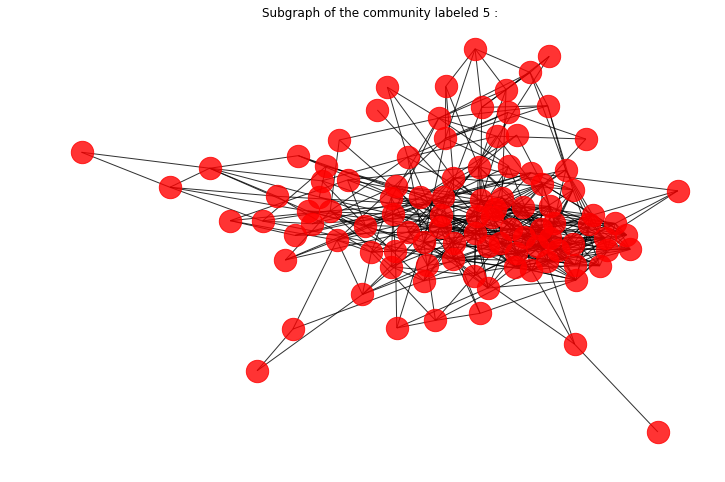

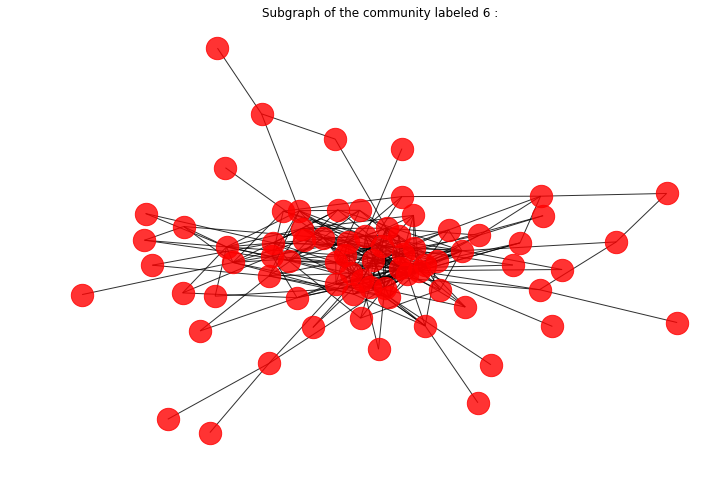

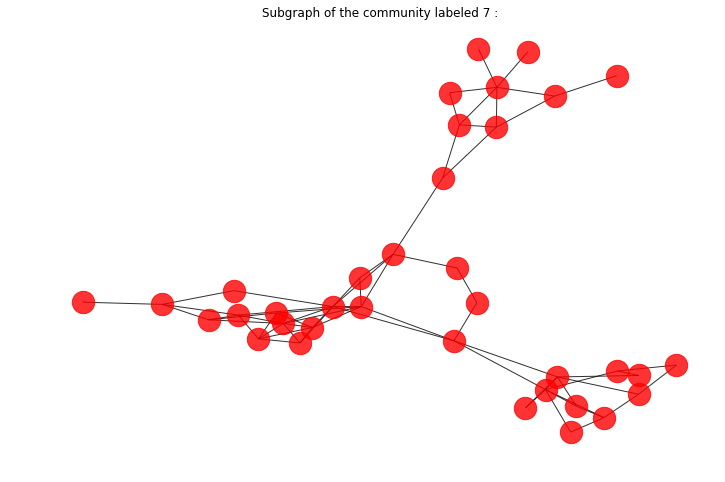

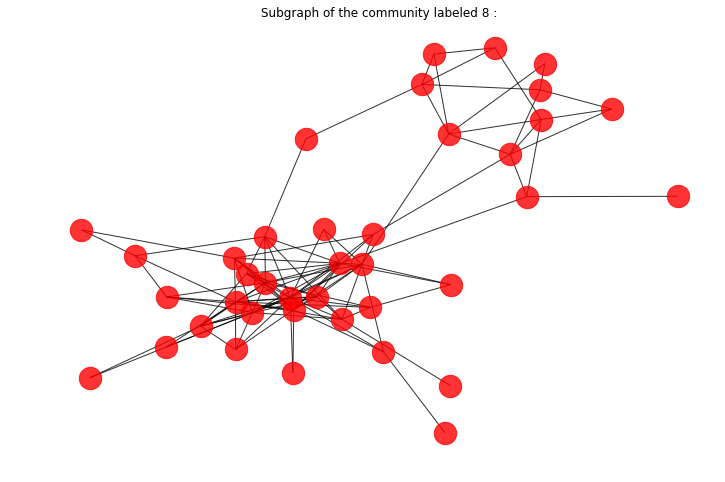

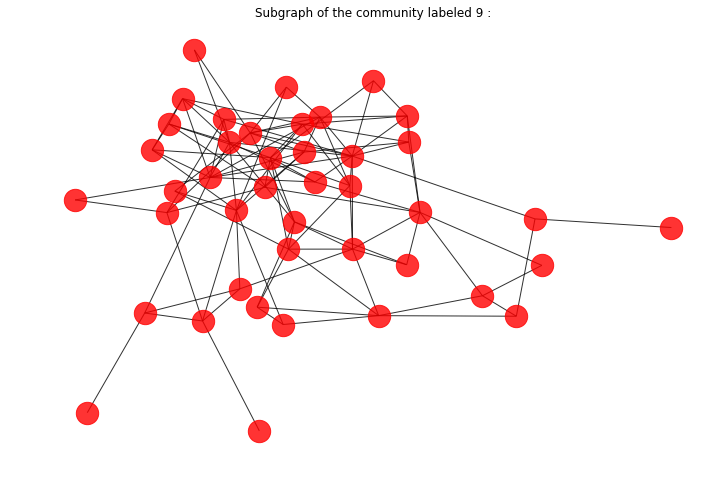

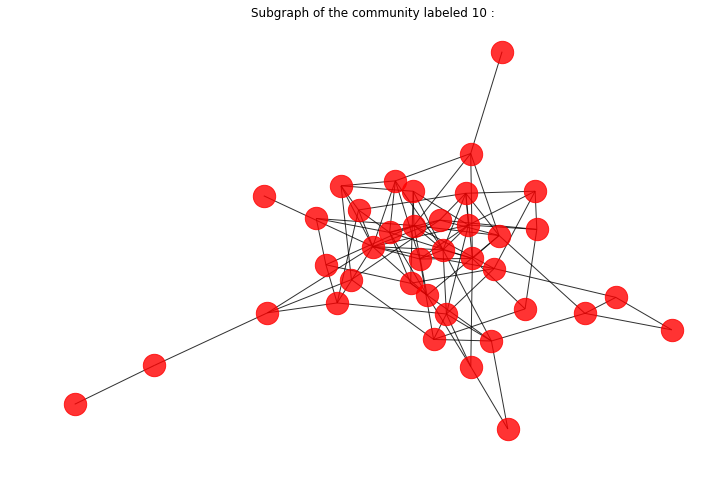

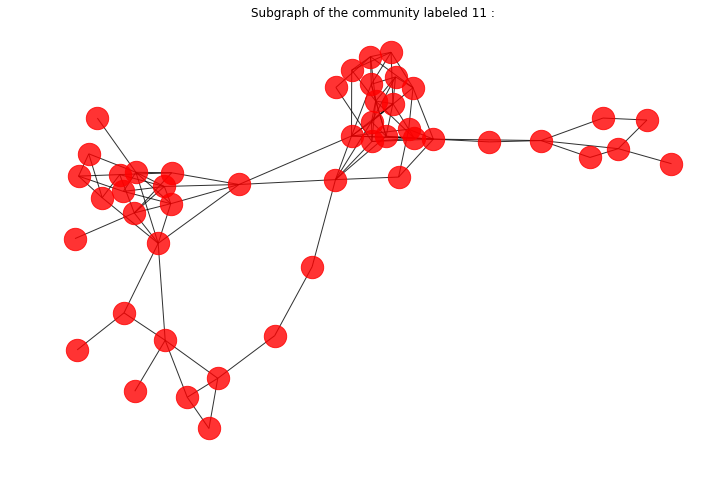

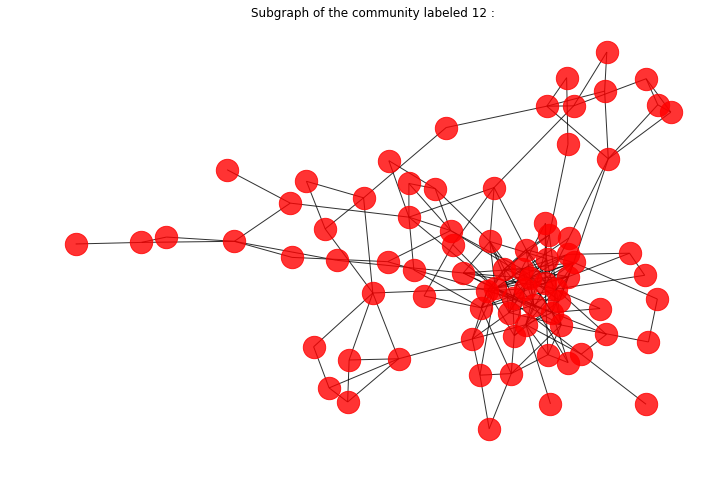

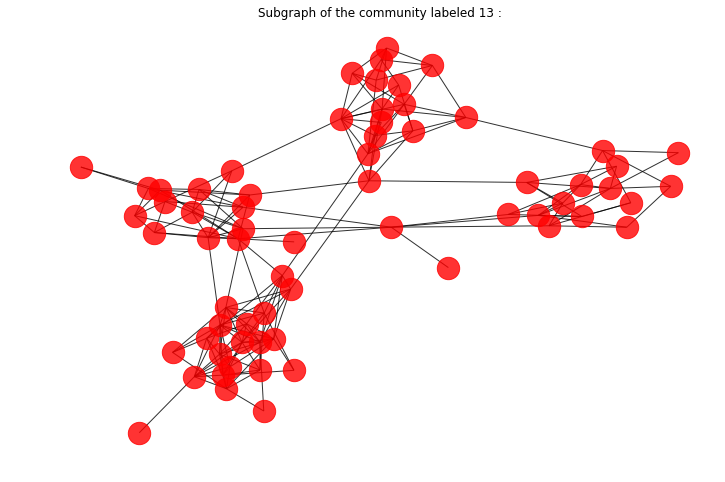

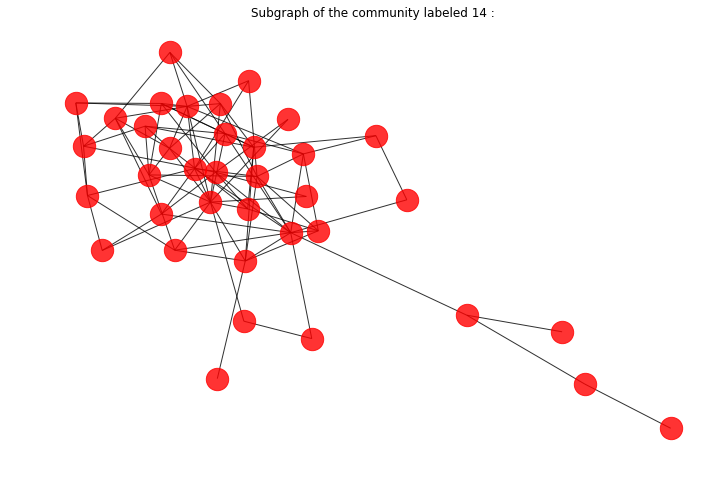

In [17]:
Community_Subgraphs = dict()
for i in set(partition.values()):
    # Get the list of nodes in community labeled i
    tmp_nodes_list = [nodes for nodes in partition.keys() if partition[nodes] == i]
    # Extract the graph
    subgraph_tmp = Undirected_TransferNetwork_Club.subgraph(tmp_nodes_list)
    Community_Subgraphs[i] = subgraph_tmp
    # plot the graph of this community
    plt.figure(figsize=(12,8))
    nx.draw_networkx(subgraph_tmp, pos=nx.spring_layout(subgraph_tmp), node_size=500, alpha=0.8, with_labels = False,)
    plt.axis('off')
    plt.title(f'Subgraph of the community labeled {i} :')
    plt.show()

### 1.5
***For each community, calculate and print the total value of transfers internal to that community. hint: It should be easy to do this using the subgraphs created in the previous step, but take care to avoid double counting. Sum these values.***

In [18]:
# Creation of the outut dataset
transfer_value = pd.DataFrame(index = Community_Subgraphs.keys(), columns = ['Sum_TotalValue'])
# Iterate on each community
for c in Community_Subgraphs.keys():
    # Define the temporary sum
    sum_totalvalue_tmp = 0
    list_edge_summed = []
    # We iterate on all the edges of the community subgraph
    for i in Community_Subgraphs[c].adj.keys():
        # We iterate on the nodes corresponding link with the corresponding edges.
        for k in Community_Subgraphs[c].adj[i].keys():
            # We check if it has already be sum
            if (k in list_edge_summed) == False:
                sum_totalvalue_tmp += Community_Subgraphs[c].adj[i][k]['TotalValue']
            # Creation of this list to avoid summing up twice.
            list_edge_summed.append(i)
    transfer_value.loc[c] = sum_totalvalue_tmp
display(HTML(transfer_value.to_html()))
print(f'The total value of all transfers internal to that community is {transfer_value.sum()}')

The total value of all transfers internal to that community is Sum_TotalValue    8490704001
dtype: int64


In [19]:
sum_totalvalue = 0
list_edge_summed = []
for i in Undirected_TransferNetwork_Club_unordered.adj.keys():
    for k in Undirected_TransferNetwork_Club_unordered.adj[i].keys():
        if (k in list_edge_summed) == False:
            sum_totalvalue += Undirected_TransferNetwork_Club_unordered.adj[i][k]['TotalValue']
        list_edge_summed.append(i)
print(f'The total value of all transfers found in the network is {sum_totalvalue}.\n')
print(f'The ratio of the total value of internal transfers of the communities over the value of all transfers found in the network is {transfer_value.sum()/sum_totalvalue}.\n')

The total value of all transfers found in the network is 16947916001.0.

The ratio of the total value of internal transfers of the communities over the value of all transfers found in the network is Sum_TotalValue    0.500988
dtype: float64.



***How does this total internal value compare to the total value of all transfers found in the network (hint: Sum the TotalValue of all links in the original network) ?***

As we see in the printed results, the **ratio** of the total value of internal transfers of the communities over the value of all transfers found in the network is approximately **0.5**, which means that **total internal value is approximately half of the value of the total value of all transfers found in the network.**

**This makes sense as by doing the calculation per communities, we omitted to sum the total value corresponding to the edges linking communities between them. Thus, as expected, our ratio is inferior compared to 1** which make sense and the 0.5 value is also a logical number for this kind of ratio.

### 1.6

***For each community, count the number of clubs in that community from each nation. Using those counts, calculate the percentage of clubs in that community hailing from each nation. Also, calculate the percentage of all of the clubs from each nation that appear in that given community. For example, say you find a community with 20 clubs, 5 of which are from Switzerland, and there are 15 Swiss clubs in the entire data set (original network). The first quantity (count) would be five. The second quantity (percentage within community) would be 5/20 = 25%. The third quantity (percentage of all clubs from nation) would be 5/15 = 33%. For each community print the Top 10 nations (based on count). Please make this a nice formatted print that also includes the percentages calculated.***


In [20]:
# We first create a list of all the different name of nation involved.
# We could have use a dataframe with unique function()
list_nation = []
for i in Undirected_TransferNetwork_Club_unordered.node():
    if (Undirected_TransferNetwork_Club_unordered.node[i]['Club_LeagueNation'] in list_nation) == False :
        list_nation.append(Undirected_TransferNetwork_Club_unordered.node[i]['Club_LeagueNation'])
print(f'There is {len(list_nation)} present in the dataset')
# We then count the occurence of all nation in the entire graph.
# To optimize the code we could have done it in the same for loop but it was less clear
overall_nation = pd.DataFrame(index = list_nation, columns = ['Count']).fillna(0)
for i in Undirected_TransferNetwork_Club_unordered.node():
    overall_nation.loc[Undirected_TransferNetwork_Club_unordered.node[i]['Club_LeagueNation']] += 1
display(HTML(overall_nation.to_html()))
print(f'We check if the sum of the count of the occurence ({list(overall_nation.sum())[0]}) is equal to the total number of node in the graph (1029).\nThis is the case.')

There is 52 present in the dataset


We check if the sum of the count of the occurence (1029) is equal to the total number of node in the graph (1029).
This is the case.


In [21]:
# We create the asked dataframe
per_community_nation = dict()
list_check_sum = []
# We iterate on each community
for c in community_counts.keys():
    # We count the occurence of each nation in each communities.
    nation_tmp = pd.DataFrame(index = list_nation, columns = ['Count', 'percentage_within_community', 'percentage_for_all_club']).fillna(0)
    # We iterate on each node and fill up the count column
    for i in Community_Subgraphs[c].node():
        nation_tmp.loc[Community_Subgraphs[c].node[i]['Club_LeagueNation']]['Count'] += 1
    # We divide our count score with the overall number of node of each community calculated in question 1.2
    nation_tmp['percentage_within_community'] = nation_tmp['Count']/community_counts[c]
    # We divide our count score with the overall number of node in the graph calculated in the previous cell
    nation_tmp['percentage_for_all_club'] = nation_tmp['Count']/overall_nation['Count']
    # We add to our dictionary each dataframe corresponding to each community
    per_community_nation[c] = nation_tmp
    # We print the result table for each community
    print(f'\nHere is the dataframe summing up the statistic for community {c} :\n')
    nation_tmp_to_display = nation_tmp.replace({'Count':0}, np.nan).dropna(how='any').sort_values(by = 'Count', ascending = False)
    display(HTML(nation_tmp_to_display[:10].to_html()))
    list_check_sum.append(nation_tmp_to_display.sum()['Count'])
print(f'We check if the sum of the count of the occurence per community ({np.sum(list_check_sum)}) is equal to the total number of node in the graph (1029).\nThis is the case.')


Here is the dataframe summing up the statistic for community 0 :




Here is the dataframe summing up the statistic for community 1 :




Here is the dataframe summing up the statistic for community 2 :




Here is the dataframe summing up the statistic for community 3 :




Here is the dataframe summing up the statistic for community 4 :




Here is the dataframe summing up the statistic for community 5 :




Here is the dataframe summing up the statistic for community 6 :




Here is the dataframe summing up the statistic for community 7 :




Here is the dataframe summing up the statistic for community 8 :




Here is the dataframe summing up the statistic for community 9 :




Here is the dataframe summing up the statistic for community 10 :




Here is the dataframe summing up the statistic for community 11 :




Here is the dataframe summing up the statistic for community 12 :




Here is the dataframe summing up the statistic for community 13 :




Here is the dataframe summing up the statistic for community 14 :



We check if the sum of the count of the occurence per community (1029.0) is equal to the total number of node in the graph (1029).
This is the case.


For some cases, there is not enough country per community to plot a TOP10. Thus we plot the TOP10 if we have 10 different nations in the community and if we have less than 10 communities, the print them all.

### 1.7
***For each community, calculate the fraction of the community's sum of "InOutValue" contributed by nodes from each nation. Reprint the results of the previous question with an additional column for this new quantity. hint: Don't over think this, just sum the "InOutValue" field across all nodes in each community and then calculate the fraction that comes from clubs of each nation.***


In [22]:
list_check_sum = []
# We iterate on each community
for c in community_counts.keys():
    per_community_nation[c]['InOutValue_fraction'] = 0
    # Sum the "InOutValue" field across all nodes in each community.
    sum_inoutvalue_tmp = 0
    for i in Community_Subgraphs[c].node():
        sum_inoutvalue_tmp += Community_Subgraphs[c].node[i]['InOutValue']
    # We then do this sum per nation and store result in the dataframe.
    for i in Community_Subgraphs[c].node():
        per_community_nation[c].loc[Community_Subgraphs[c].node[i]['Club_LeagueNation'], 'InOutValue_fraction'] += Community_Subgraphs[c].node[i]['InOutValue']
    # Create the new columns by using the two previous calculus
    per_community_nation[c]['InOutValue_fraction'] = per_community_nation[c]['InOutValue_fraction'] / sum_inoutvalue_tmp
    # Display the result as before
    print(f'\nHere is the dataframe summing up the statistic for community {c} :\n')
    tmp_to_display = per_community_nation[c].replace({'Count':0}, np.nan).dropna(how='any').sort_values(by = 'Count', ascending = False)
    display(HTML(tmp_to_display[:10].to_html()))
    list_check_sum.append(tmp_to_display.sum()['Count'])
print(f'We check if the sum of the count of the occurence per community ({np.sum(list_check_sum)}) is equal to the total number of node in the graph (1029).\nThis is the case.')


Here is the dataframe summing up the statistic for community 0 :




Here is the dataframe summing up the statistic for community 1 :




Here is the dataframe summing up the statistic for community 2 :




Here is the dataframe summing up the statistic for community 3 :




Here is the dataframe summing up the statistic for community 4 :




Here is the dataframe summing up the statistic for community 5 :




Here is the dataframe summing up the statistic for community 6 :




Here is the dataframe summing up the statistic for community 7 :




Here is the dataframe summing up the statistic for community 8 :




Here is the dataframe summing up the statistic for community 9 :




Here is the dataframe summing up the statistic for community 10 :




Here is the dataframe summing up the statistic for community 11 :




Here is the dataframe summing up the statistic for community 12 :




Here is the dataframe summing up the statistic for community 13 :




Here is the dataframe summing up the statistic for community 14 :



We check if the sum of the count of the occurence per community (1029.0) is equal to the total number of node in the graph (1029).
This is the case.


### 1.8

***For each community, does a specific nation dominate in either measure. If yes, which nation.***

**For the majority of the community, one nation per community dominate all the measure. This fact is nearly perfectly true for the percentage of a total value within the community and for the InOut value fraction. The specific nation that dominates in either measure is always the one having the higher number of counts, meaning the higher occurrence inside each community.**

This is a little bit less true for the measure corresponding to the percentage of clubs of one nation over the count of the total number of representants of this nation. In fact, it happens that the second nation in this ranking has a value of one, which means that all the club from this nation are included in this community while the first nation for other measure has a smaller score around 0.9. This effect can be seen on the community with ID 3, 4, 5. This effect makes sense as the ratio is done over a different value for each nation.  

***Does the domination differ between the "counting" version of the ranking (question 6) and the weighted sum (question 7) differ for any communities?***

**The domination between the "counting" version of the ranking (question 6) and the weighted sum (question 7) is mostly the same as before, meaning that nation having a high occurrence (high number of counts) in the community dominates the ranking. These rules differ for 3 communities.** The ranking after the dominating nation (form second to tenth) would change but the first would mostly stay the highest counted nation.

In the following explanation, the "counting" version of the ranking is what we call *the percentage within the community score* and then the weighted sum is what we call *InOut value fraction score*.

3 exceptions to the rule emitted just above are observable : 
  * For community 7, **the nation who has the best percentage within community and percentage for all clubs score has the second score in term of InOut value fraction.** This can perhaps be explained by the fact that the difference in the score for the two first metrics is small (less than 0.1) and the count score is also similar (2 counts of difference). 
  * The **same effect is visible for community 13 where the third nation in term of percentage within the community has the best InOUt value fraction score.** This is again remarkable that difference between counting dominating node and weighted sum dominating node for other 'counting' metrics are low: count difference is 6, percentage_within_community difference is below 0.1, and the percentage_for_all_club are identical. 
  * For community 2, **the nation who has the best percentage within community and percentage for all clubs score has the second score in term of InOut value fraction.** On the opposite of the two previous cases, the 'counting' metrics are different: count difference is 25, percentage_within_community difference is 0.25, and the percentage_for_all_club is 0.7. Thus, in this case, the weighted sum has a huge impact.

**For these exceptions we can say that there are two clubs dominating the community : one with the highest occurence and one with the highest financial power.**

### 1.9
***For each community, print the top five clubs (i.e. nodes) ranked by "InOutValue". To make interpretation easier, also print each club's nation and league.***

For some case, there is not enough country per community to plot a TOP5. Thus we plot the TOP5 if we have 5 different nations in the community and if we have less than 5 communities, the print them all.

In [23]:
community_node = dict()
# We iterate on each community
for c in community_counts.keys():
    node_in_community = pd.DataFrame(index = Community_Subgraphs[c].node(), columns = ['Club_Name','InOutValue', 'Club_League','Club_LeagueNation'])
    # Attribute in a dataframe the wanted info, which is InOutValue, club's nation, league
    for i in Community_Subgraphs[c].node():
        node_in_community.loc[i]['Club_Name'] = Community_Subgraphs[c].node[i]['Club_Name']
        node_in_community.loc[i]['InOutValue'] = Community_Subgraphs[c].node[i]['InOutValue']
        node_in_community.loc[i]['Club_League'] = Community_Subgraphs[c].node[i]['Club_League']
        node_in_community.loc[i]['Club_LeagueNation'] = Community_Subgraphs[c].node[i]['Club_LeagueNation']
    print(f'\nHere is the top five clubs ranked by "InOutValue" for community {c} :\n')
    # We sort dataframe following the InOutValue score
    tmp_to_display = node_in_community.sort_values(by = 'InOutValue', ascending = False).reset_index(drop = True)[:5]
    tmp_to_display['InOutValue'] = tmp_to_display['InOutValue'].astype(int)
    display(HTML(tmp_to_display.to_html()))


Here is the top five clubs ranked by "InOutValue" for community 0 :




Here is the top five clubs ranked by "InOutValue" for community 1 :




Here is the top five clubs ranked by "InOutValue" for community 2 :




Here is the top five clubs ranked by "InOutValue" for community 3 :




Here is the top five clubs ranked by "InOutValue" for community 4 :




Here is the top five clubs ranked by "InOutValue" for community 5 :




Here is the top five clubs ranked by "InOutValue" for community 6 :




Here is the top five clubs ranked by "InOutValue" for community 7 :




Here is the top five clubs ranked by "InOutValue" for community 8 :




Here is the top five clubs ranked by "InOutValue" for community 9 :




Here is the top five clubs ranked by "InOutValue" for community 10 :




Here is the top five clubs ranked by "InOutValue" for community 11 :




Here is the top five clubs ranked by "InOutValue" for community 12 :




Here is the top five clubs ranked by "InOutValue" for community 13 :




Here is the top five clubs ranked by "InOutValue" for community 14 :



### 1.10
***Is it the case that for most communities the top clubs are those from the nation that also dominate the rankings calculated in questions 6 and 7? Which cases notably diverge? Can you see an obvious reason for this?***


We can **see on the print result table that, mostly, the same rules can again be applied **: For the majority of the community, one nation per community dominates all the measures. The specific nation that dominates in either measure is always the one having the higher number of counts, meaning the higher occurrence inside each community. In fact, **for most communities, the top clubs are those from the nation that also dominate the rankings calculated in questions 6 and 7.**

We have seen some exceptions when the weighted mean score was taking into account for community 2,7,13, but the previous rule holds for the majority.

Now adding the top five clubs ranked by "InOutValue", we are able to check this rule in this new case. As we said, the **rule is mainly true, meaning that the majority of the clubs in the Top5 per communities are club coming from the dominant nation.** But again some exception can be noticed mainly coming from communities we noticed in the previous question :
   * Community 2: It is **not really a huge exception** but some facts can be noticed. This community is one of the noticed exceptions when using the weighted mean score. This analysis has concluded that **France and Spain dominate this community.** This is mostly the case for the Top5 with 4 clubs belonging to this two nations (we consider Monaco is french as they play in Ligue 1). The fact to notice is that **the first club in term of InOutValue is Manchester City an English club.** It **make sense as this club is one of the most powerful clubs in the world in term of money** and thus this InOUtValue being link to the financial power, the first place makes sense. He is the only English club in this community, that is also why there is a contradiction between this Top5 and the dominants nation. **He is in this community due to his financial power and due to his high number of trades with clubs like Barcelona or Paris. So it makes sense.**
   * Community 4: Again, from the previous analysis, we are able to say that **Brazil should be dominant with Argentina playing a second role.** This is mostly the case with **4 clubs belonging to these two countries in the Top5.** Again, the **first club don't come from these nations** due to the previous reasons: Porto have more financial power compared to the other clubs in the community and as there are **just 4 Portugeses clubs in this community, it can't dominate it.** Porto is at the **first place due to his financial power and this club is in this community because he does a lot of trading with South America countries **: this is a well-known fact that Porto buys a lot of players in South America.
   * Community 7: This is again not a huge exception, but we have seen previously that in this community **there are two dominant clubs instead of one. This is clearly visible in the Top5.** 
   * Community 8: From our previous analysis, **Roumania should dominate this community.** This is approximately the case with **3 clubs in the Top5** but as for community 2 and 4, **the first club is not belonging to this country. It is again because this club has higher financial power and do a lot of trading with Roumanian clubs.**
   * Community 13: **This community should be dominated by Egypt but only one club belonging to this nation is present in the Top5.** The first club is the **only French clubs belonging to this community**. This rank is due to a **partnership with Arabian countries and a higher financial power.** Then, 3 clubs belonging to Saudi Arabia are in the Top5. This makes sense as **in our previous analysis, we noticed a difference between the "counting" version of the ranking (question 6) and the weighted sum (question 7) inducing domination of Saudi Arabia in the second case.** By this analysis, we can conclude that in this community two nations are dominating: **Egypt with a highest club occurrence and Saudi Arabia with a higher financial power.**
   
**To conclude, for most communities, the top clubs are those from the nation that also dominate the rankings calculated in questions 6 and 7. For some communities, two clubs are dominant as we already noticed in the previous question. Other communities have a Top5 with one outlier club meaning he does a lot of trading with clubs inside community and that he has a higher financial power.**
  

### 1.11

***From the results and interpretation of questions 6 through 10 assign a label to each community and save that in a dictionary. For example, if a community is dominated by English clubs, perhaps call that community: English_1. If dominated by two nations, Nation1/Nation2. If by a specific world region, ex. Asia.***


For the majority of the community, one nation per community dominate all the measure. The specific nation that dominates in either measure is usually the one having the higher number of counts, meaning the higher occurrence inside each community.

From the comparison between "counting" version of the ranking (question 6) and the weighted sum (question 7), we were able to identify communities where two clubs were dominating instead of one: one with the highest occurrence and one with the highest financial power.

From the InOutValue Top5, we were able to polish our observation and to find some nodes where one outlier club has a lot of importance due to a lot of trading with clubs inside the community and due to a higher financial power.

Thanks to that we were able to create this dictionary :

In [24]:
label_community = {0:'Turkey_1',
                   1:'Germany_1',
                   2:'French/Spain',
                   3:'Russia_1',
                   4:'SouthAmerica',
                   5:'England_1',
                   6:'Italy_1',
                   7:'Czech_Republic/Bulgaria',
                   8:'Europe_East',
                   9:'Spain_1',
                   10:'Netherlands_1',
                   11:'Greece_1',
                   12:'China_1',
                   13:'SaudiArabia/Egypt',
                   14:'Poland_1',}


### 1.12

***Using the community.induced_graph function find the induced graph in which communities are now nodes. Use the option weight='TotalValue'. Plot this network using a spring layout. Label each node using the labels you arrived at in the previous step (you may need to shorten them). Do not worry about labeling links.***


In [25]:
import math
def plot_induced_graph(G, label_community, log = False):
    plt.figure(figsize=(18,8))
    G = nx.relabel_nodes(G, label_community)
    pos = nx.spring_layout(G)
    # plot nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, alpha=0.5)
    if log == False :
        # plot edges with widths depending on weights
        nx.draw_networkx_edges(G, pos, alpha=0.5, width = [d['TotalValue']/100000000 for u,v,d in G.edges(data=True)])
    else :
         # plot edges with widths depending on weights
        nx.draw_networkx_edges(G, pos, alpha=0.5, width = [np.log10(d['TotalValue'])/2 for u,v,d in G.edges(data=True)])
    # add node labels
    nx.draw_networkx_labels(G, pos, node_labels = label_community.values())
    plt.title('Induced Graph')
    plt.axis('off')
    plt.show()

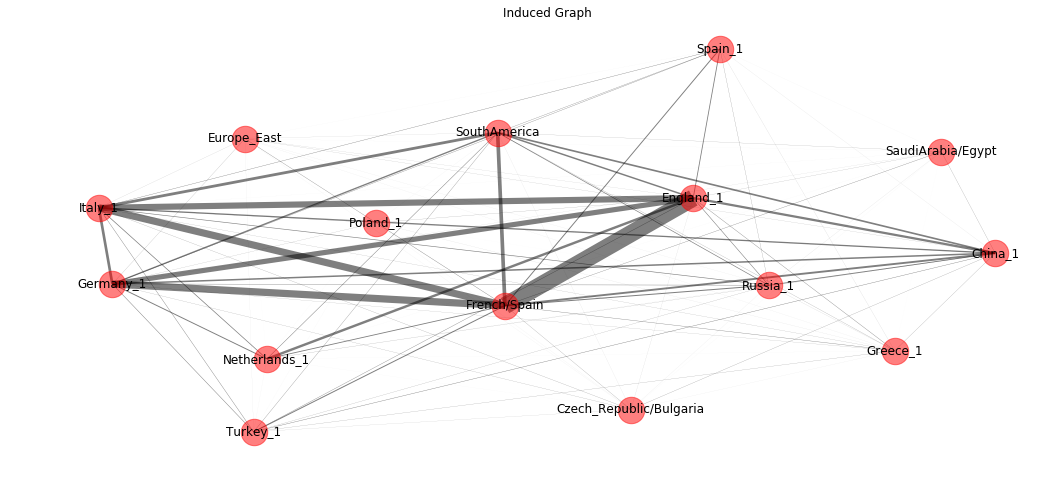

In [26]:
induce_graph = community.induced_graph(partition, Undirected_TransferNetwork_Club, weight='TotalValue')
plot_induced_graph(induce_graph, label_community)

### 1.13

***Using the induced graph from the previous step, now filter out all links with weight less than 50,000,000 euros. Plot the graph again using the spring layout such that the edge widths are proportional to the logarithm of the edge weight. You will likely have to multiply the raw logarithm by a scaling factor so the links are in proper proportion to the nodes.***

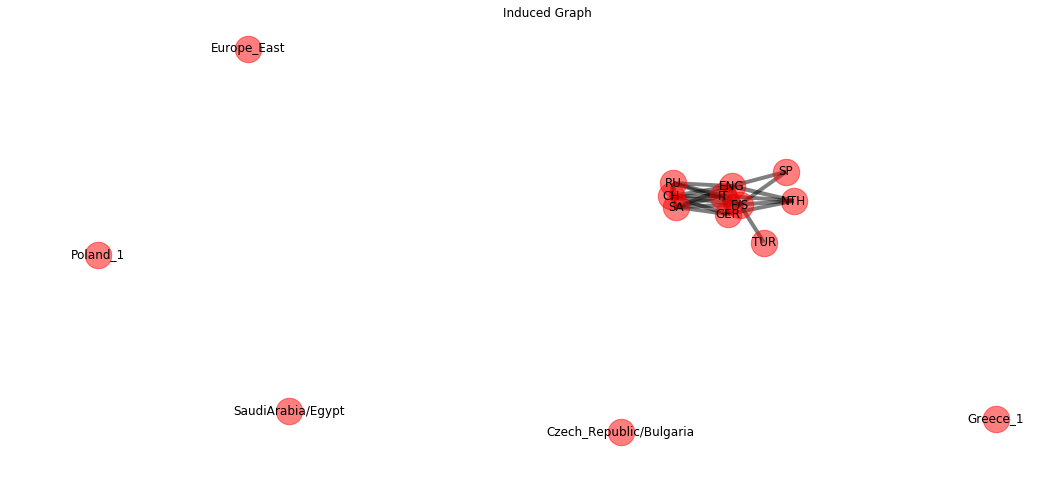

In [27]:
# specify the threshold
threshold = 50000000
induce_graph_reduced = community.induced_graph(partition, Undirected_TransferNetwork_Club, weight='TotalValue')

# find the edges which weight is less than the threshold
edges_to_remove = [(u,v) for u,v,d in induce_graph_reduced.edges(data=True) if d['TotalValue'] < threshold]

# remove these edges from the graph
induce_graph_reduced.remove_edges_from(edges_to_remove)

# change label name to make it readable
label_community[0] ='TUR'
label_community[1] ='GER'
label_community[2] ='F/S'
label_community[3] ='RU'
label_community[4] ='SA'
label_community[5] ='ENG'
label_community[6] ='IT'
label_community[9] ='SP'
label_community[10] ='NTH'
label_community[12] ='CH'

# plot the result
plot_induced_graph(induce_graph_reduced, label_community, log = True)

----
## Problem 2
25 points.

In this problem we will explore some of the models covered in the lectures in through comparison to a real network.

1. Load the network "network_1.txt". If this network were an ER random graph, what would its $p$ value be? [<span style="color:red">Technical</span>] [1]

2. Given that $p$ value, what connectivity regime do you expect the network to be in? Now calculate the size of the largest connected component. Does this match your expectation given your prediction based on $p$. Make a new network that is the Giant Connected Component and __use the GCC for all further analysis.__ [<span style="color:blue">Analytical</span>] [1]

3. Using the powerlaw package from Assignment 2, fit both a powerlaw and an exponential to this network's degree distribution. Use xmin = 2. Plot the cdf with the fitted curves. Using the plot, and the compare function, decide which is a better fit. [<span style="color:red">Technical</span>] [2]

4. If this were an undirected version of the "follow" network of a social media platform (_ex._ instagram, twitter, _etc_) what conclusions would you draw about the process by which accounts (people) decide who to follow? Are there any internal or external forces that may play a key role? [<span style="color:blue">Analytical</span>] [3]

5. Now calculate the average clustering coefficient of this network. Is this consistent with your thoughts from the previous question on how, and whom, people decide to follow? Does the average clustering coefficient result change, or add, any internal or external forces to your consideration. [<span style="color:blue">Analytical</span>] [2]

6. Now we will generate a randomized version of this network by rewiring links. First make a copy of the original network, call it G_Rewired. Choose a number of rewirings (N_rewire) you will do to randomize the network. This number should be at least two times the number of links in the network (but not excessively so or run time will get high). Now write a loop that will repeat the following N_rewire times:
>1. Select two different links at random. Note that it is probably easier to just reject cases where you select the same link twice, than to try to select the second link conditional on the first.
>2. Select, at random, one end point (node) of each of the two links.
>3. Attempt to swap the randomly selected end points.
>4. Accept the new links if neither previously existed in the network and neither are self-loops. Note that it is probably easiest to accomplish this by an "if" statement in which you check these criteria, and then if neither link is a violation, add the new links to the network and delete the old ones.
>
> Note that in the final rewired network each node should have exactly the degree it had in the beginning.
> [<span style="color:red">Technical</span>] [5]

7. What is the average clustering coefficient of this new, rewired, network? How does that compare to the clustering coefficient of the original network? If similar, why? If different, from where does this discrepancy arise? [<span style="color:blue">Analytical</span>] [2]

8. How does it compare to the clustering coefficient you would expect if this were an ER random graph (calculate it analytically)?  If similar, why? If different, from where does this discrepancy arise? [<span style="color:blue">Analytical</span>] [1]

9. Calculate the PageRank for the original network and the rewired network. Create a scatter plot in which PageRank - Rewired is on the y-axis and PageRank - Original is on the x-axis. How strongly correlated are these two quantities? Why do you see that degree of correlation? [<span style="color:blue">Analytical</span>] [2]

10. In the scatter plot created in the previous step, what does it mean when a node lies above x=y. Below x=y? [<span style="color:blue">Analytical</span>] [1]

11. Now calculate the ratio of PageRank - Original over PageRank - Rewired for each node. When this quantity is greater than one, what does it tell us about the importance of a node and its place in the network? How about when it is less than one? [<span style="color:blue">Analytical</span>] [2]

12. Make a scatter plot with the ratio calculated in the previous step on the y-axis and PageRank - Original on the x-axis. What do you note? Are there many outliers? Do the extreme outliers tend to be above or below one? How do you interpret that trend? [<span style="color:blue">Analytical</span>] [2]

13. Here we have analyzed one rewired network, but that network may not be representative of all rewired networks. Hypothetically, how would you propose to check whether or not it were representative? Again hypothetically, if you found that your rewired networks were not, individually, representative how would you get around this? [<span style="color:blue">Analytical</span>] [1]

#### Problem 2 Grades

2.1) None/1

2.2) None/1

2.3) None/2

2.4) None/3

2.5) None/2

2.6) None/5

2.7) None/2

2.8) None/1

2.9) None/2

2.10) None/1

2.11) None/2

2.12) None/2

2.13) None/1

Total: None/25

In [28]:
Problem2Score = None

---

### 2.1

***Load the network "network_1.txt". If this network were an ER random graph, what would its  p  value be?***

Name: 
Type: Graph
Number of nodes: 486
Number of edges: 4037
Average degree:  16.6132

p is the probability of edge creation : 
p = average_degree/(number_of_nodes -1) = 16.6132/(486-1) = 0.0342540206185567
p = average_number_links*2/number_of_nodes*(number_of_nodes -1) = 4037*2/486*(486-1) = 0.03425395613253574


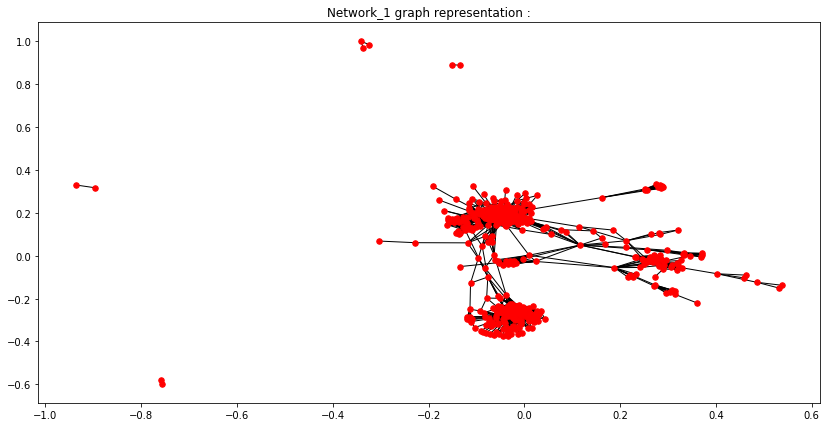

In [29]:
graph = nx.read_edgelist('./network_1.txt')
print(nx.info(graph))
print(f'\np is the probability of edge creation : \np = average_degree/(number_of_nodes -1) = 16.6132/(486-1) = {16.6132/485 }')
print(f'p = average_number_links*2/number_of_nodes*(number_of_nodes -1) = 4037*2/486*(486-1) = {(4037*2)/(486*485)}')


# Plot the graph
plt.figure(figsize=(14,7))
nx.draw_networkx(graph, pos=nx.spring_layout(graph), with_labels = False, node_size = 30)
plt.title('Network_1 graph representation :')
plt.show()

Erdős-Rényi random graphs, also known as Poisson random graphs, or sometimes just “random graphs” are probably the earliest graph model. The model is quite simple :

The network is formed with N nodes and, between each pair of nodes, a link exists with probability p.
Let's calculate the probability that a node has degree k : we know for each 1 in adjacency matrix there was a factor of p and for each 0 a factor of 1-p. And we also know that a node of degree k will have k 1’s. So we can rewrite to:
$$p(k) ∝ p^{k}(1-p)^{N-1-k}$$
But we are missing one final piece as this is the probability that the node has exactly those links, so we must include the combinatoric factor accounting for all possible combinations leading to degree k. We thus obtain a binomial distribution : 
![Binomial Distribution](bin.png)

To obtain this kind of graph, we need to follow the following procedure :

1. Start with N isolated nodes.
2. Pick up a pair of nodes (i,j) and pick a random number between 0 and 1. If the random number is greater than p, place a link between i and j.
3. Repeat Step 2 for all N(N-1)/2 distinct pairs of nodes.

There is another variant of this type of graph that always has exactly L links, but we will not use it in our analysis. 

Thus, the average number of links for an ER random graph is:
$$<L> = \frac{pN(N-1)}{2}$$
Thus for the average degree we get:
$$<k> = \frac{2<L>}{N} = p(N-1)$$
Approximating this binomial as a Poisson process, which is valid in the limit $<k> << N$, we  get the following equation. As long as $<k> << N$, p(k) does not depend on N.
![Poisson Distribution](poisson.png)

**Thanks to all these equations, we are able to find the probability p in two different ways :**
$$p = \frac{<L>*2}{N*(N-1)} = \frac{<k>}{N-1} = 0.03425$$

### 2.2
***Given that p-value, what connectivity regime do you expect the network to be in?***

As we found in the previous question, p = 0.03425 which is a low probability.
Moroever, we know that there is 486 nodes in the graph. Thus, $n*p = 486*0.03425 = 16.65 > 1$. 

**By definition, we have a random graph in a super-critical connectivity regime (with np>1).** In fact, the other types of regime are random graphs with sub-critical regime (np<1) or random graph in critical point (np=1).


***Now calculate the size of the largest connected component. Does this match your expectation given your prediction based on  p.***

In our case, by definition of a random graph having np>1 (super-critical regime), **the largest connected component almost surely has a unique giant component containing a positive fraction of the vertices, and there are no other components whose size is of order larger than  log2(n).** We will thus verify it.

In [30]:
component_sizes = lambda graph: [len(component) for component in (nx.connected_components(graph))]
print("Value of log2(n): {:.3f}".format(np.log2(len(graph.node()))))
print("Sizes of all connected components of the graph:")
print(sorted(component_sizes(graph))[::-1])

Value of log2(n): 8.925
Sizes of all connected components of the graph:
[477, 3, 2, 2, 2]


Thanks to the printed results, **we can conclude that the hypothesis stated just above holds for this graph.**

Let's say $N_{G}$ is the number of node in the Giant Connected Component and where $<k>$ is the average degree.

In fact, we are in the following case : $<k> > 1$ which means :
   * A connected component on the size of the network emerges.
   * $N_{G} \tilde{} (p-p_{c})*N$
   * This is called the super-critical regime.
   
   
More precisely, we are also this situation: $<k> > ln N$ which means:

   * Essentially all nodes are part of the connected component
   * All the connected components start to join.
   * $N_{G} ≅N$
   * This is called the connected regime.
   
**Thus we are in a super-critical connected regime and the size of the largest connected component underline this fact.**

***Make a new network that is the Giant Connected Component and use the GCC for all further analysis.***

In [31]:
graph_GCC = max(nx.connected_component_subgraphs(graph), key=len)
print(nx.info(graph_GCC))

Name: 
Type: Graph
Number of nodes: 477
Number of edges: 4032
Average degree:  16.9057


*graph_GCC* is the new graph we will use for all the further analysis which correspond to the Giant Connected Component of our graph. 

### 2.3

***Using the powerlaw package from Assignment 2, fit both a powerlaw and an exponential to this network's degree distribution. Use xmin = 2. Plot the cdf with the fitted curves. Using the plot, and the compare function, decide which is a better fit.***

In [32]:
def fit_power_law(G, distribution_1 = 'power_law', distribution_2 = 'exponential', exponent_pl = True):
    '''
    This function allows the fitting of the degree distribution of a graph, 
    the plotting of the data with two defined law and the comparison between two laws.
    ARGS :
        - G : Graph Networkx object giving us the degree distribution.
        - distribution_1 : string corresponding to the name of the first law use in the graph and in the comparison calculation
        - distribution_2 : string corresponding to the name of the second law use in the graph and in the comparison calculation
        - exponent_pl : Boolean defining if you want to print the alpha exponent of the power law
    RETURN :
        - R : Float corresponding to the loglikelihood ratio between two candidate distributions.
        - p : Float corresponding to the significant value.
    '''
    
    # List containing the degree of each node
    degree_G_pairs = list(G.degree())
    degree_G = zip(*degree_G_pairs)
    degree_G = list(list(degree_G)[1])
    # Sort the list in increasing order
    degree_G.sort()
    
    # Fit and plot on the same figure
    fit = powerlaw.Fit(degree_G, xmin = 2)
    fig = fit.plot_ccdf(color='b', linewidth=2, label='Fit of the degree')
    # Dictionary containing the different fit values :
    if (distribution_1 == 'power_law') | (distribution_2 == 'power_law'):
        fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig, label='Fitted power law')
    if (distribution_1 == 'exponential') | (distribution_2 == 'exponential'):
        fit.exponential.plot_ccdf(color='g', linestyle='--', ax=fig, label='Fitted exponential')
    if (distribution_1 == 'lognormal') | (distribution_2 == 'lognormal'):
        fit.lognormal_positive.plot_ccdf(color='y', linestyle='--', ax=fig, label='Fitted log-normal')
    plt.title(f'Fit of the Giant Connected Component degree distribution with the fitted powerlaw, and the fitted exponential :')
    plt.legend()
    plt.show()
    
    if exponent_pl == True :
        # Print the max, min and mean in_Degree in the table format with two columns
        print('Network statistics :')
        print('{:^30}\t{:^7}'.format('Minimum in_degree:', degree_G[0]))
        print('{:^30}\t{:^7}'.format('Maximum in_degree:', degree_G[-1]))
        print('{:^30}\t{:^7}'.format('Mean number in_degree:', sum(degree_G)/len(degree_G)))
        # Find the exponent of the powerlaw
        print('\nFitted parameter alpha of the power law distribution: {:.3f}'.format(fit.power_law.alpha))
        print('Standard error of alpha: {:.3f}'.format(fit.power_law.sigma))
    
    # Find the R and p values
    R, p = fit.distribution_compare(distribution_1, distribution_2)
    print(f'\nHere you find the R and p value for comparison between {distribution_1} and {distribution_2} :')
    print('R = {:.5f}'.format(R))
    print('p = {:.5f}'.format(p))
    
    return R, p

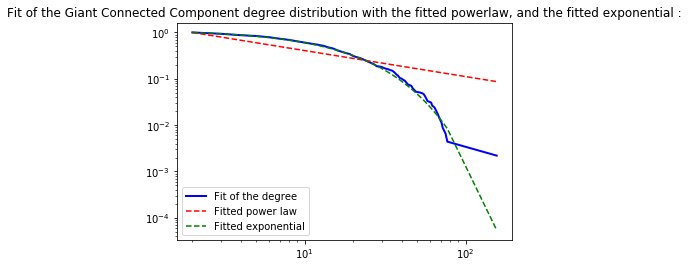

Network statistics :
      Minimum in_degree:      	   1   
      Maximum in_degree:      	  156  
    Mean number in_degree:    	16.90566037735849

Fitted parameter alpha of the power law distribution: 1.561
Standard error of alpha: 0.026

Here you find the R and p value for comparison between power_law and exponential :
R = -137.96837
p = 0.00000


In [33]:
R, p = fit_power_law(graph_GCC)

**Use the distribution_compare function to find which distribution is a better fit?**

To find out which distribution is a better fit, we used the distribution_compare() function. This process allows us to find R and p values :
   * $R$ is the loglikelihood ratio between two candidate distributions (in this case, between the power law distribution and the exponential distribution). If $R$ is positive, the data is more likely to follow the first distribution. If $R$ is negative, the data is more likely to follow the second distribution.
   * $p$ is the significant value. If $p<0.05$, we conclude that the fits are significantly different. For example, if $R>0$, and $p<0.05$, we conclude that the first candidate distribution is significantly better at fitting the data than the second candidate distribution.

**With $R = -137.96837$ and $p = 0.00000$, we can conclude that the exponential is better at fitting the data compare to the power law, and this fact is significant taking into account the p-value. Be careful : the setting of xmin = 2 is extremely important. In fact, without it, the power law would be best.**

**Does this match what you see in the figure?**

Based on visual inspection it's easy to see on the plot above that the exponential is a better fit of the degree distribution. In fact, the distance for each point of the exponential with the fit of the degree distribution values is smaller than for the fitted power law. **Thus distribution_compare function match what we see in the figure.**

**What is the power-law exponent?**

The information on the power-law fit are the following :
   * Fitted parameter alpha of the power law distribution: 1.561
   * Standard error of alpha: 0.026

### 2.4

***If this were an undirected version of the "follow" network of a social media platform (ex. instagram, twitter, etc) what conclusions would you draw about the process by which accounts (people) decide who to follow? ***

Thanks to the 3 previous questions, we have gathered information on the network :
   * The network is composed of 486 nodes, with 4037 edges and thus with an average degree of 16.6132.
   * If this graph was a random graph, we would have a probability p of p = 0.03425 which is a low value.
   * Thanks to this probability value, we are able to find the regime of the graph: we are in the case of a **super-critical connected regime.** This means that a **connected component on the size of the network emerges**, essentially all nodes are part of the connected component. Thus, the Giant Connected Component is nearly the same as the entire network.
   * The **degree distribution of the graph is well fitted by an exponential law** (by setting xmin = 2). 

Thanks to this observations, we can see that nearly every account (people) is part of the Giant Connected Component which means that **people represented by the graph are all linked directly and indirectly by their connection with the other accounts. This fact is underlined by the super-critical connected regime.** In fact, there is one big linked population in our graph.

In addition, we found that the network is formed with 486 nodes and, between each pair of nodes, a link exists with probability p = 0.03425. **This probability is low meaning that people tend to connect to a small number of people.** This **connected population to each node could represent their friends, which means people they already know in the real life.**  This fact **is also underlined by the fit of the degree distribution of the graph by an exponential law.** Indeed, this exponential trend means that the majority of accounts have small numbers of connections and that a really small proportion of individuals represented by the graph have a lot of connections, which means a high degree. In fact, by definition, the exponential shape is steep.  

**Thus, from this analysis, we can conclude that this graph represents a linked population, connected with a majority of nodes having a low degree. This graph can be the representation of a community like a school, where each individual is following a small number of people in the same school. In fact, it can be a small world network. In a school, people with a lot of followers could be the students' representant or the coolest guy in the school. **


**Are there any internal or external forces that may play a key role?**

**The forces that may play a role could be the social interaction in real life and the population context.** In fact, it seems to be a network of a connected population. **The external force that may play a key role is the definition of the population represented. This population should mean something**: it can be a high school, a football club, a company ... Inside this population, **the major force is the real-life social interactions that can allow people to know each other and then to connected inside the entire population.** These people are a part of a **large population but without knowing everyone. The person with a high degree should have an important role in this population, allowing him to be followed or follow more people**

### 2.5

***Now calculate the average clustering coefficient of this network.***

In [34]:
average_clustering_coef = nx.average_clustering(graph_GCC)
print(f'The average clustering coefficient of the Giant connected component of the graph is : {average_clustering_coef}')

The average clustering coefficient of the Giant connected component of the graph is : 0.5543508373294909


**Clustering Theory:**

In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterized by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes. The networks with the largest possible average clustering coefficient are found to have a modular structure, and at the same time, they have the smallest possible average distance among the different nodes.

**Average clustering:** The average clustering is the mean of the clustering coefficient of each node where the clustering coefficient of a node is the fraction of a node’s neighbors that are also linked.

**Random Graph:** As shown in the course,  the local clustering coefficient $C_{i}$ is exactly the density of the network. In real networks, the average clust >> D though.

***Is this consistent with your thoughts from the previous question on how, and whom, people decide to follow? Does the average clustering coefficient result change, or add, any internal or external forces to your consideration.***

A clustering coefficient of 0.55, **is consistent with your thoughts from the previous question.** In fact, this coefficient means **that people tend to form clusters.** From our previous guess, **these clusters would come from the social interaction in real life inside the entire population, creating small groups of 'friends'** for example. Indeed, in real life, people tend to form some groups and then two groups can be linked thanks to two individuals who know each other. This thing is also true for a social media platform (ex. Instagram, twitter, etc). **To sum up, the network is the network of a defined population that share characteristics. This fact is the cause of the huge Giant Connected Component and the super-critical connected regime. Then inside this global population, clusters tend to exist. Theses clusters are made due to social interactions in the real life. For example, friendship between a group of friend in the entire population could be the cause of a cluster. Then, people with high degree are the one having an special position in the population.**

**Moreover, this coefficient clustering make us think that this network is like a small world network.** A small-world network is a type of mathematical graph in which most nodes are not neighbors of one another, but the neighbors of any given node are likely to be neighbors of each other and most nodes can be reached from every other node by a small number of hops or steps. This is the opposite when the clustering coefficient is lower. You also need to have typical distance L between two randomly chosen nodes (the number of steps required) grows proportionally to the logarithm of the number of nodes N in the network to have small world network.

### 2.6

***Now we will generate a randomized version of this network by rewiring links. First make a copy of the original network, call it G_Rewired. Choose a number of rewirings (N_rewire) you will do to randomize the network. This number should be at least two times the number of links in the network (but not excessively so or run time will get high). Now write a loop that will repeat the following N_rewire times:***
>1. Select two different links at random. Note that it is probably easier to just reject cases where you select the same link twice, than to try to select the second link conditional on the first.
>2. Select, at random, one end point (node) of each of the two links.
>3. Attempt to swap the randomly selected end points.
>4. Accept the new links if neither previously existed in the network and neither are self-loops. Note that it is probably easiest to accomplish this by an "if" statement in which you check these criteria, and then if neither link is a violation, add the new links to the network and delete the old ones.
>
> Note that in the final rewired network each node should have exactly the degree it had in the beginning.

In [35]:
# Make a copy of the original graph.
G_Rewired = graph.copy()
G_Rewired = nx.convert_node_labels_to_integers(G_Rewired)
# Choose a number of rewirings you will do to randomize the network.
N_rewire = 2*4100

In [36]:
def rewire_graph(G_graph, N_rewire):
    '''
    This function allows the generate a randomized version of the network given in argument by rewiring links.
    ARGS :
        - G_graph : Graph on which we will rewiring links.
        - N_rewire : Number of time we will rewire an edge.
    RETURN :
        - G : Rewired graph.
    '''
    G = G_graph.copy()
    # Loop that will be repeated N_rewire times: 
    for i in range (N_rewire):
        # Create two random numbers corresponding to id of edges.
        rand_int_1 = random.randint(0,len(G.edges())-1)
        rand_int_2 = rand_int_1
        # Reject cases where you select the same link twice.
        while (rand_int_1 == rand_int_2):
            rand_int_2 = random.randint(0,len(G.edges())-1)
        # Select two different links at random
        edge_1, edge_2 = list(G.edges())[rand_int_1], list(G.edges())[rand_int_2]
        # Select, at random, one end point (node) of each of the two links.
        end_point_index_1 = random.randint(0,1)
        end_point_index_2 = random.randint(0,1)
        end_point_1 = edge_1[end_point_index_1]
        end_point_2 = edge_2[end_point_index_2]
        # Swap the randomly selected end points.
        edge_1_update = list(edge_1)
        edge_1_update[end_point_index_1] = end_point_2
        edge_2_update = list(edge_2)
        edge_2_update[end_point_index_2] = end_point_1
        # Accept the new links if neither previously existed in the network and neither are self-loops. 
        if ((((edge_1_update[0], edge_1_update[1]) in list(G.edges()))==False)&(((edge_1_update[1],edge_1_update[0]) in list(G.edges()))==False) & (edge_1_update[0] != edge_1_update[1]) 
            & (((edge_2_update[0], edge_2_update[1]) in list(G.edges()))==False)&(((edge_2_update[1], edge_2_update[0]) in list(G.edges()))==False) & (edge_2_update[0] != edge_2_update[1])):
            # Supress the corresponding old edge.
            G.remove_edge(edge_1[0], edge_1[1])
            G.remove_edge(edge_2[0], edge_2[1])
            # Add one new edge.
            G.add_edge(edge_1_update[0], edge_1_update[1])
            G.add_edge(edge_2_update[0], edge_2_update[1])
    return G

In [37]:
G_Rewired = rewire_graph(G_Rewired, N_rewire)

We check and compare informations and degree distribution on the rewired graph to see if our code make sense

In [38]:
# We make safety check by comparing the average degree and the degree distribution.
print(f'The infos on the two graphs should be the same :\n')
print(f'Infos on the original graph :')
print(nx.info(graph))
print(f'Infos on the G_Rewired graph :')
print(nx.info(graph))
print(f'The equality is perfect. This make sense.')

The infos on the two graphs should be the same :

Infos on the original graph :
Name: 
Type: Graph
Number of nodes: 486
Number of edges: 4037
Average degree:  16.6132
Infos on the G_Rewired graph :
Name: 
Type: Graph
Number of nodes: 486
Number of edges: 4037
Average degree:  16.6132
The equality is perfect. This make sense.


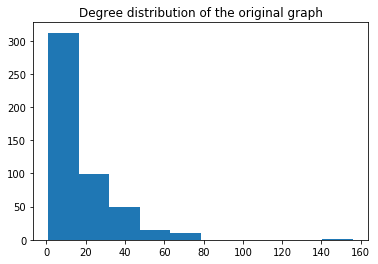

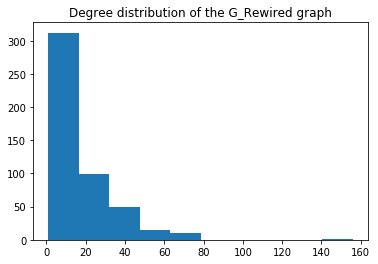

In [39]:
degree_G_pairs = list(graph.degree())
degree_G = zip(*degree_G_pairs)
degree_G = list(list(degree_G)[1])
plt.hist(degree_G)
plt.title('Degree distribution of the original graph')
plt.show()
degree_G_pairs = list(G_Rewired.degree())
degree_G = zip(*degree_G_pairs)
degree_G = list(list(degree_G)[1])
plt.hist(degree_G)
plt.title('Degree distribution of the G_Rewired graph')
plt.show()

Degree distribution are exactly the same meaning that our code seems to be reliable.

### 2.7
***What is the average clustering coefficient of this new, rewired, network?***

In [40]:
average_clustering_coef_rewised = nx.average_clustering(G_Rewired)
print(f'The average clustering coefficient of the Giant connected component of the graph is : {average_clustering_coef_rewised}')

The average clustering coefficient of the Giant connected component of the graph is : 0.12271042496924542


***How does that compare to the clustering coefficient of the original network?***

Before this process, the clustering coefficient had a value of 0.55. The new coefficient has a value of 0.12. Thus, by generation of a randomized version of this network by rewiring links, the clustering coefficient decreased a lot.

***If similar, why? If different, from where does this discrepancy arise?***

**This decreasing make sense.** In fact, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterized by a relatively high density of ties. **Indeed, by randomization, we suppress external and internal forces applied on the networks, as for example social interactions. Thus the clusters made due to these forces also disappeared and the average clustering coefficient decrease.** 

As the average degree in this network is low, the number of edges per nodes is low and by suppressing these external forces that create the meaning of connections, each node has a probability of 0.03 to create an edge with another node and thus cluster should not be formed. This is logical by definition of the randomness.

### 2.8
***How does it compare to the clustering coefficient you would expect if this were an ER random graph (calculate it analytically)?***

**In ER random graph, the average clustering coefficient is equal to the density $<C> = D$**.

In fact, recall our definition of the local clustering coefficient:
$$C_{i} = \frac{2L_{i}}{k_{i}(k_{i}-1)}$$
But the nice thing with the ER random graph is that it is pretty easy to estimate the expected $<L_{i}>$ given that you know $k_{i}$ :
$$<L_{i}> = \frac{pk_{i}(k_{i}-1)}{2}$$
Substituting we get:
$$<C> = p = \frac{<k>}{N} = Density$$

**Thus, to find the clustering coefficient you would expect if this were an ER random graph, we need to calculate the density. **

The density of a network is defined as: $D_{G} = \frac{L}{L_{max}}$ where $L_{max}$ is the (theoretical) maximum number of links that could possibly exist. Thus, for undirected networks we get: $D_{G} = \frac{2L}{[N(N-1)]}$

In our case, we have $D = \frac{2*4037}{[486(486-1)]} = 0.03425 = p $.

As we expected, this density is equal to the value p, as we said before.

***If similar, why? If different, from where does this discrepancy arise?***

It's not similar. In fact, the theoretical clustering coefficient is 0.03425 whereas the one of our rewired graph is 0.12 which is higher. 

This means that our rewired graph **is not a perfect ER random graph.** This is due to the fact that **to create the rewired graph, we use the edges structure of the original graph. Indeed, we change randomly the existing edges of the original graph but we never change the total number of edges** ( by adding new ones or deleting some existing ones). **This inherited structure can't be changed with our algorithm and thus intrinsically, the perfect theoretical clustering coefficient could not be reached.**

### 2.9

***Calculate the PageRank for the original network and the rewired network. Create a scatter plot in which PageRank - Rewired is on the y-axis and PageRank - Original is on the x-axis.*** 


In [41]:
def ScatterPlot(X_Variable,X_VariableName,Y_Variable,Y_VariableName):
    '''
    This function allows the making of pretty scatter plots.
    ARG :
        - X_variable : List corresponding to the different values of the X_varaibale of the scatter plot.
        - X_VariableName : String corresponding to the name of the X variable we will use in the label of the plot.
        - Y_variable : List corresponding to the different values of the Y_varaibale of the scatter plot.
        - Y_VariableName : String corresponding to the name of the Y variable we will use in the label of the plot.
    RETURN :
        - None object is return but a scatter plot and some correlation values are printed. 
    '''
    # Scatter plot
    fig = plt.figure(figsize = (10, 6))
    ax = fig.add_subplot(111)
    ax.set_xlabel(X_VariableName,fontsize=10)
    ax.set_ylabel(Y_VariableName,fontsize=10)
    plt.scatter(X_Variable, Y_Variable, alpha=0.5)
    plt.title(f'Scatter plot of the {Y_VariableName} in function of {X_VariableName} coming from the network')
    plt.xlim(left=-0.001)
    plt.ylim(bottom=-0.001)
    plt.show()
    # Correlation coefficient 
    df = pd.DataFrame()
    df[X_VariableName] = X_Variable
    df[Y_VariableName] = Y_Variable
    method = ['pearson', 'spearman']
    print(f'The Pearson Correlation coefficient (linear) for these two variable is {df.corr(method=method[0])[X_VariableName][Y_VariableName]}')
    print(f'The Spearman Correlation coefficient (monotonic) for these two variable is {df.corr(method=method[1])[X_VariableName][Y_VariableName]}')

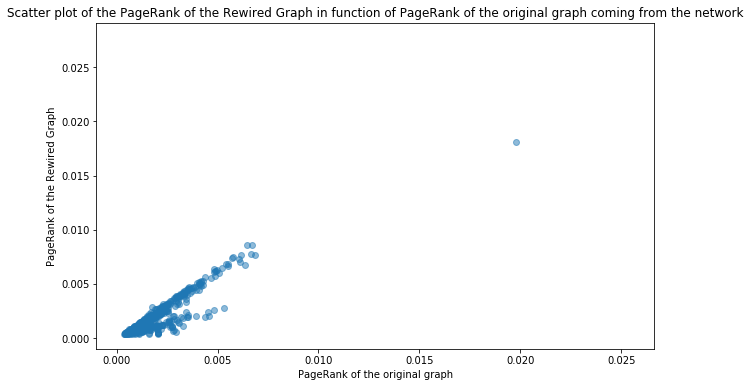

The Pearson Correlation coefficient (linear) for these two variable is 0.9149403850246774
The Spearman Correlation coefficient (monotonic) for these two variable is 0.8486014292709609


In [42]:
graph = nx.convert_node_labels_to_integers(graph)
pagerank_original_scores = []
pagerank_rewired_scores = []
# PageRank calculation
pagerank_original = nx.pagerank(graph)
pagerank_rewired = nx.pagerank(G_Rewired)

for node in graph.nodes():
    pagerank_original_scores.append(pagerank_original[node])
    pagerank_rewired_scores.append(pagerank_rewired[node])
    
# Creation of the scatter plot
ScatterPlot(pagerank_original_scores,"PageRank of the original graph", pagerank_rewired_scores, "PageRank of the Rewired Graph")

**PageRank is an eigenvector centrality measure** but it seeks the **steady-state probability distribution for the likelihood that a walker randomly moving from node to node along links will be on anyone node at any point in time.** In a directed graph trapping is prevalent, thus stochastic dead is added. In the infinite time horizon, the probability of finding a walker at any given node in this processes corresponds to its PageRank score. **PageRank says a node is important when it is likely to be randomly walked to.** This is a global diffusion/flow process. 

The scatter plot tells us that the **big majority of the points are located in the left bottom part of the graph.** It means that the majority of the node as a PageRank value inferior to 0.01.

In addition, we detect **one extreme value that looks like an outlier.** In fact, the righter value which has a PageRank value of 0.2 is isolated.

More specifically, the node's position in the scatter relative to the line x=y tell us that the **two variables are linearly correlated.** Moreover, the Pearson correlation coefficient is illustrating this fact. **This correlation means that nodes with a small PageRank value in the original graph will have a small PageRank value in the rewired graph** and nodes with a high PageRank value in the original graph will have a high PageRank value in the rewired version.


***How strongly correlated are these two quantities?***

As you can see, **the Pearson Correlation coefficient (linear) is 0.91 which is really high. Thus we can say that these two variables are extremely linearly correlated.** In addition, we also observe a **Spearman Correlation coefficient (non-linear) of 0.84 which is high.** The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other. **Thus, the two variables are a nearly perfect monotone function of each other.**

***Why do you see that degree of correlation?***

PageRank is an eigenvector centrality measure but it seeks the steady-state probability distribution for the likelihood that a walker randomly moving from node to node along links will be on anyone node at any point in time. **PageRank says a node is important when it is likely to be randomly walked to. Thus, by definition, we expect this kind of relationship as a random walk is done thanks to edges and as the number of edges and the density of both graph stay the same between the two versions.**

In fact, as in the original graph, each node was connected to a small number of nodes with a small number of edges, the randomization of the edges did not impact a lot the rewired PageRank value. Moreover, clustering level of the graph is not taking into account (not directly and it's not extremely important) for this measure whereas the clustering measure is one of the most impacted statistics in the graph due to randomization.

How do you interpret the outlier of this relationship?

Outliers in this cases are the more connected nodes in the graph corresponding to the ones with the higher PageRank values. It means that these nodes are the more 'central' nodes. In fact, a higher PageRank value means a higher probability of finding a walker at any given node.

### 2.10
***In the scatter plot created in the previous step, what does it mean when a node lies above x=y. Below x=y?***



In the previous step, when a node lies **above x=y line**, it means that **thanks to randomization of the graph by rewiring, the PageRank value of a node has increased compared to this measure in the original graph.** In opposition, when a node lies **below x=y line**, it means that due to randomization of the graph by rewiring, the PageRank value of a node **has decreased** compare to this measure in the original graph.

**We can see that the majority of the node are either perfectly linearly correlated either in the second case, where randomization decrease the PageRank value.** PageRank is an eigenvector centrality measure but it seeks the steady-state probability distribution for the likelihood that a walker randomly moving from node to node along links will be on anyone node at any point in time. PageRank says a node is important when it is likely to be randomly walked to. 

Thus it makes sense that randomization has a small decreasing effect on PageRank score. **In fact, even if clustering coefficient is not directly taken into account in the score, it affects it a little bit.** In fact, randomization has the effect of decreasing the clustering coefficient. When clusters are suppressed, you also delete the importance of some central nodes and thus you decrease the PageRank score. It can also theoretically increase the score but it's less visible on this graph. Indeed, an important node in the original graph lost some importance but other non-central nodes can gain importance.

**This effect is visible for the 'more important node', which is the one which has the highest degree, which is the outlier. In fact, considering the previous arguments, it makes sense because rewired nodes make node lost importance as the forces implicated in this centrality is replacing by randomness.** This fact is really visible on the outlier as the original PageRank ratio is 0.02 and the rewired PageRank ration is 0.018.

### 2.11

***Now calculate the ratio of PageRank - Original over PageRank - Rewired for each node.***

In [43]:
ratio_pagerank = []
pagerank_original = nx.pagerank(graph)
pagerank_rewired = nx.pagerank(G_Rewired)

# Ratio calculation for each node
for node in graph.nodes():
    ratio_pagerank.append(pagerank_original[node]/pagerank_rewired[node])

***When this quantity is greater than one, what does it tell us about the importance of a node and its place in the network? How about when it is less than one?***

When this ratio is greater than one, **it means that the PageRank score of the original graph is bigger than the PageRank score of the rewired graph.**

The fact that the ratio is high means also that the rewiring process suppresses the centrality and importance of the node. **In fact, we need to keep in mind that to have a high ratio, the original score should be high but also the rewired PageRank score should be low.**

In addition, **if the node was really important, the score of the original network should be a lot more higher than the one in the rewired graph. This would produce a ratio much greater than one. This kind of ratio underlines the high importance of the node and his central role in the all network.** In fact,  PageRank says a node is important when it is likely to be randomly walked to which implies his importance and centrality in the network. 

Randomization has the a global effect of decreasing the clustering coefficient. When clusters are suppressed, you also **delete the importance of some central nodes and thus you decrease the PageRank score. This process implies ratio superior to one. It can also increase the score and it would correspond to ratio below one. Indeed, an important node in the original graph lost some importance but other non-central nodes can gain importance thanks to randomization.**


### 2.12
***Make a scatter plot with the ratio calculated in the previous step on the y-axis and PageRank - Original on the x-axis.*** 

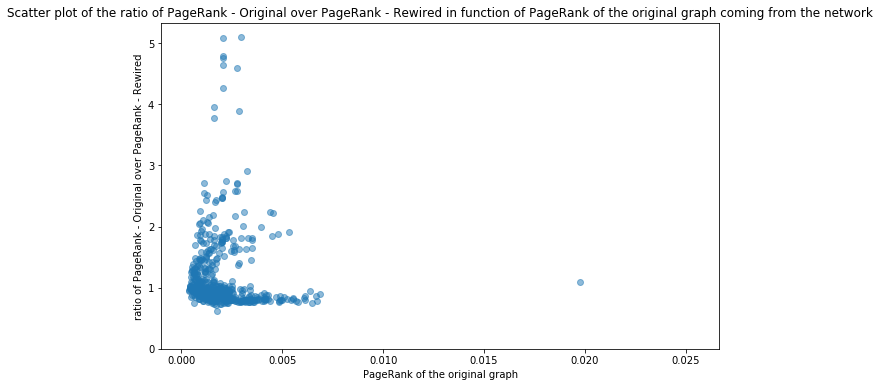

The Pearson Correlation coefficient (linear) for these two variable is -0.05927986282406826
The Spearman Correlation coefficient (monotonic) for these two variable is -0.30295137187514776


In [44]:
# Creation of the scatter plot
ScatterPlot(pagerank_original_scores,"PageRank of the original graph", ratio_pagerank, "ratio of PageRank - Original over PageRank - Rewired")

***What do you note? Are there many outliers? Do the extreme outliers tend to be above or below one? How do you interpret that trend?***

We can visualize the same process as the one we describe in question 2.10 and 2.11.

In fact, **majority of the nodes has a ratio around one, meaning that the score did not change with the randomization. It corresponds to the nodes which are the more linearly correlated in the previous scatter graph of the question 12.10.**

Some nodes have a ratio inferior to one but **all these nodes stay next to one, meaning that thanks to randomization, the PageRank score increase, but as we can see, it did not increase a lot.** Indeed, an important node in the original graph can lose some importance but **other non-central nodes can gain importance thanks to randomization.** We say that **non-central nodes** can increase score because as the values of the ratio are below but around one, there are no outliers next to 0, meaning that there are no nodes with extremely higher score compare to the PageRank of the original graph.

There is **no clear linear correlation** between the PageRank score of the original network and the ratio. 

The **nodes are on the bottom left of the graph meaning that the nodes have mainly a low PageRank score. The previous outlier is visible on the right part of the scatter. In addition to this node, several new outliers appear corresponding to high ratio values. These extreme outliers tend to be above one.**

Indeed, we observe that higher ratio node is more present. In fact, we can see in this scatter that, the majority of the node having a different ratio than 1, tend to have a ratio superior to 1. This makes sense from all we already said in the previous questions: in fact, **PageRank says a node is important when it is likely to be randomly walked to. Thus it makes sense that randomization has a decreasing effect on PageRank score for important nodes. In fact, even if the clustering coefficient is not directly taken into account in the score, it affects it a little bit.** In fact, randomization has the effect of decreasing the clustering coefficient. When clusters are suppressed, you also delete the importance of some central nodes and thus you decrease the PageRank score.

**To conclude, this scatters analysis underlines well the effect of randomization on the PageRank score. This effect is a global decrease in this score due to randomization with some extreme decrease for particular nodes. Nodes having a high PageRank score in the original graph are more sensitive to this decrease. This is visible with the ratio mainly around and above 1. Thus, the randomization seems to suppress the structure that gives importance to some nodes.**

### 2.13

***Here we have analyzed one rewired network, but that network may not be representative of all rewired networks. Hypothetically, how would you propose to check whether or not it were representative? Again hypothetically, if you found that your rewired networks were not, individually, representative how would you get around this?***

Hypothetically, **to check whether or not this rewired network was representative, I would repeat for several different  real networks the same rewiring process.** If **results are the same for a different network, it means that this graph is representative of all rewired networks.** On the opposite, if results differ we are forced to reject this hypothesis. 

***Again hypothetically, if you found that your rewired networks were not, individually, representative how would you get around this?***

**After the rewired process, we end up with a network in which the degree of each node has not changed, but is a completely random network, without self-linking or multiple edges.** This model that lack any meaningful conceptual underpinnings, is more useful for data analysis purposes. He is primarily useful for determining whether or not a characteristic of a given network is just a result of the degree distribution. **Thus to get around this, I would do again my analysis on a new representative network. I would be in this case sure that my new network is representative from the rewire family and thus that my results could be generalized.**